In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [11]:
def moving_average(data, window_size=10):
    sum_vec = np.cumsum(np.insert(data, 0, 0))
    moving_ave = (sum_vec[window_size:] - sum_vec[:-window_size]) / window_size
    return moving_ave

In [12]:
def display_stats(agent, training_totals, testing_totals, history):
    ''' Print and plot the various statistics from q-learning data.
    Args:
        agent: Agent containing variables useful for post analysis
        training_totals: List of training rewards per episode.
        testing_totals: List of testing rewards per episode.
        epsilon_hist: List of all epsilon values.
    '''
    print('******* Training Stats *********')
    print('Average: {}'.format(np.mean(training_totals)))
    print('Standard Deviation: {}'.format(np.std(training_totals)))
    print('Minimum: {}'.format(np.min(training_totals)))
    print('Maximum: {}'.format(np.max(training_totals)))
    print('Number of training episodes: {}'.format(agent.training_trials))
    print()
    print('******* Testing Stats *********')
    print('Average: {}'.format(np.mean(testing_totals)))
    print('Standard Deviation: {}'.format(np.std(testing_totals)))
    print('Minimum: {}'.format(np.min(testing_totals)))
    print('Maximum: {}'.format(np.max(testing_totals)))
    print('Number of testing episodes: {}'.format(agent.testing_trials))
    fig = plt.figure(figsize=(10, 7))
    # Plot Parameters plot
    ax1 = fig.add_subplot(311)
    ax1.plot([num + 1 for num in range(agent.training_trials)],
             history['epsilon'],  # epsilon_hist,
             color='b',
             label='Exploration Factor (Epsilon)')
    ax1.plot([num + 1 for num in range(agent.training_trials)],
             history['alpha'],  #alpha_hist,
             color='r',
             label='Learning Factor (Alpha)')
    ax1.set(title='Paramaters Plot',
            ylabel='Parameter values',
            xlabel='Trials')

    # Plot rewards
    ax2 = fig.add_subplot(312)
    ax2.plot([num + 1 for num in range(agent.training_trials)],
             training_totals,
             color='m',
             label='Training',
             alpha=0.4, linewidth=2.0)
    total_trials = agent.training_trials + agent.testing_trials
    ax2.plot([num + 1 for num in range(agent.training_trials, total_trials)],
             testing_totals,
             color='k',
             label='Testing', linewidth=2.0)
    ax2.set(title='Reward per trial',
            ylabel='Rewards',
            xlabel='Trials')

    # Plot rolling average rewards
    ax3 = fig.add_subplot(313)
    window_size = 10
    train_ma = moving_average(training_totals, window_size=window_size)
    train_epi = [num+1 for num in range(agent.training_trials-(window_size-1))]
    ax3.plot(train_epi, train_ma,
             color='m',
             label='Training',
             alpha=0.4, linewidth=2.0)
    test_ma = moving_average(testing_totals, window_size=window_size)
    total_trials = total_trials - (window_size*2) + 2
    test_epi = [num+1 for num in range(agent.training_trials-(window_size-1), total_trials)]
    ax3.plot(test_epi, test_ma,
             color='k',
             label='Testing', linewidth=2.0)
    ax3.set(title='Rolling Average Rewards',
            ylabel='Reward',
            xlabel='Trials')

    fig.subplots_adjust(hspace=0.5)
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    ax3.legend(loc='best')

******* Training Stats *********
Average: 116.394
Standard Deviation: 48.91571080951395
Minimum: 9
Maximum: 200
Number of training episodes: 2000

******* Testing Stats *********
Average: 127.54
Standard Deviation: 38.64541887468682
Minimum: 71
Maximum: 200
Number of testing episodes: 100


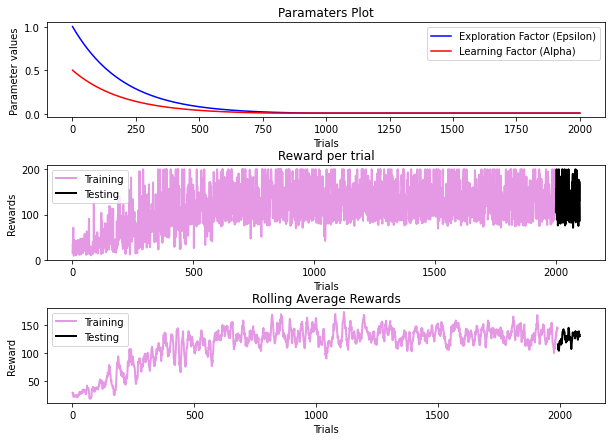

In [37]:
with open('../data/tabular.pkl', 'rb') as in_f:
    results = pickle.load(in_f)
display_stats(results['agent'], results['training rewards'], results['test rewards'], results['parameter history'])

******* Training Stats *********
Average: 78.6635
Standard Deviation: 40.757186700629866
Minimum: 8
Maximum: 200
Number of training episodes: 2000

******* Testing Stats *********
Average: 89.15
Standard Deviation: 31.464066806438105
Minimum: 43
Maximum: 194
Number of testing episodes: 100


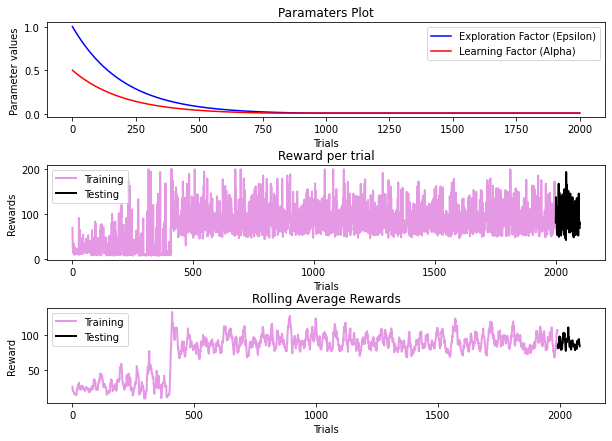

In [32]:
with open('../data/function.pkl', 'rb') as in_f:
    results = pickle.load(in_f)
display_stats(results['agent'], results['training rewards'], results['test rewards'], results['parameter history'])